# Import Data And Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics


# Load the data
song= pd.read_csv('data.csv')

## <li> The Data From Kaggle Website 
    

### <li>Context<br>
    A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning I like it and "0" for 
    songs I don't like. 
    
    We used this to data to see if We could build a classifier that could predict whether or not We would like a song.
    
    

### <li>Content<br>
    Each row represents a song.
    
    There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called
    "target" which is the label for the song.
    
    Here are the 13 track attributes: acousticness, danceability, durationms, energy, instrumentalness, key,
    liveness,loudness, mode, speechiness, tempo, timesignature, valence.

In [2]:
song.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
song.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Missing Values?

In [4]:
song.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
print("Is there any missing data? : ", song.isna().any().any())

Is there any missing data? :  False


# Drop Duplicate

In [6]:
songs=song.copy()
songs.drop_duplicates(subset=None,inplace=True)
song=songs

# Drop None Important Featuers

In [7]:
print('The Dimension of the dataset before drop the features:', song.shape)
dataset = song.drop(['song_title','artist'], axis = 1,inplace=True)
print('The Dimension of the dataset after drop the features:', song.shape)

The Dimension of the dataset before drop the features: (2012, 16)
The Dimension of the dataset after drop the features: (2012, 14)


# Take a Look at the Data

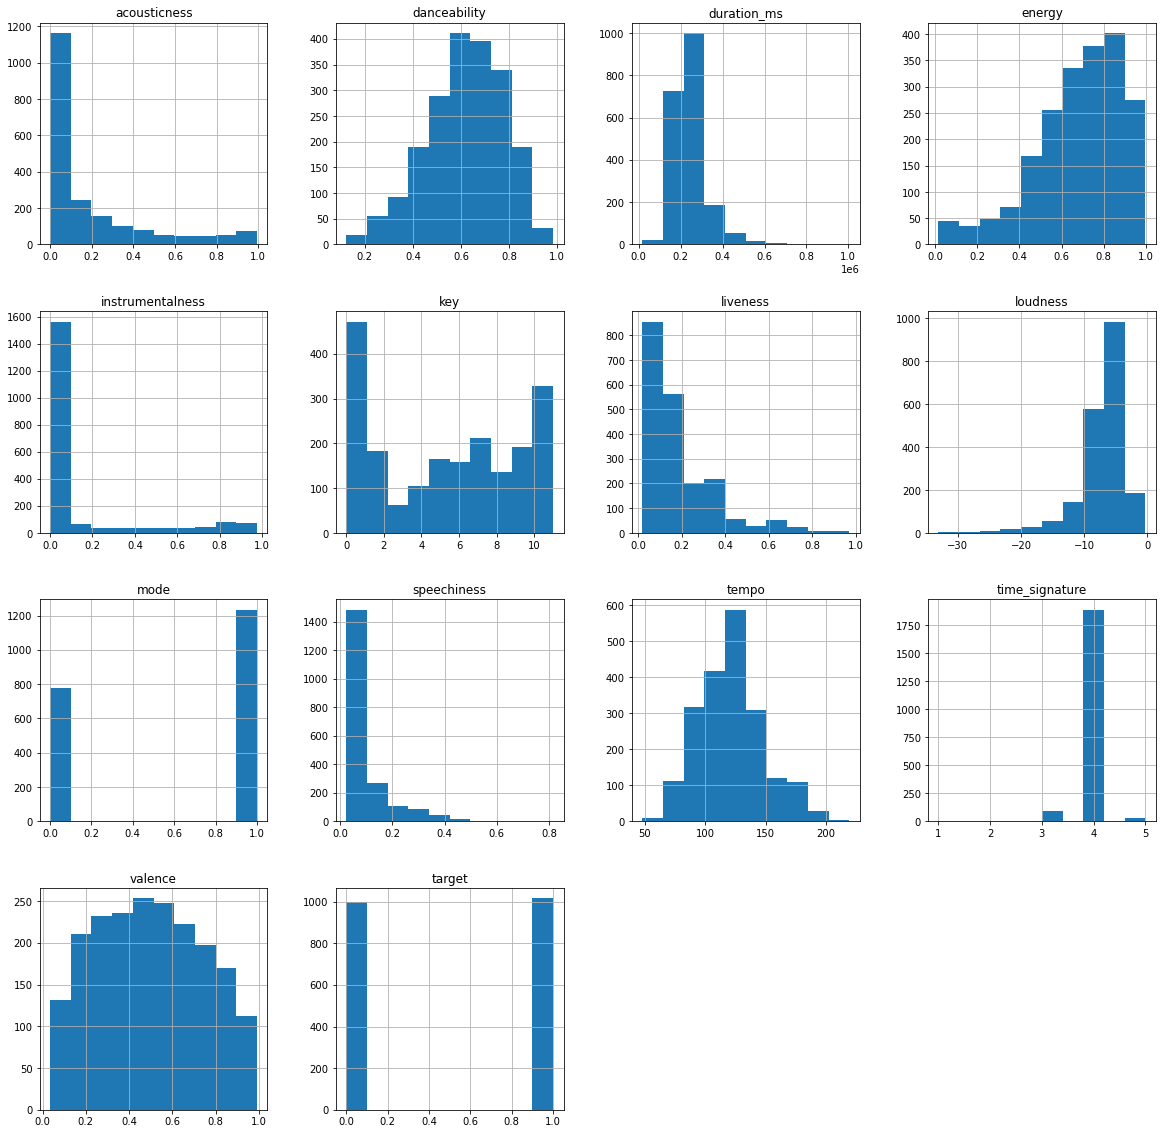

In [8]:
import matplotlib.pyplot as plt
song.hist(figsize=(20,20))
plt.show()

# correlation my data


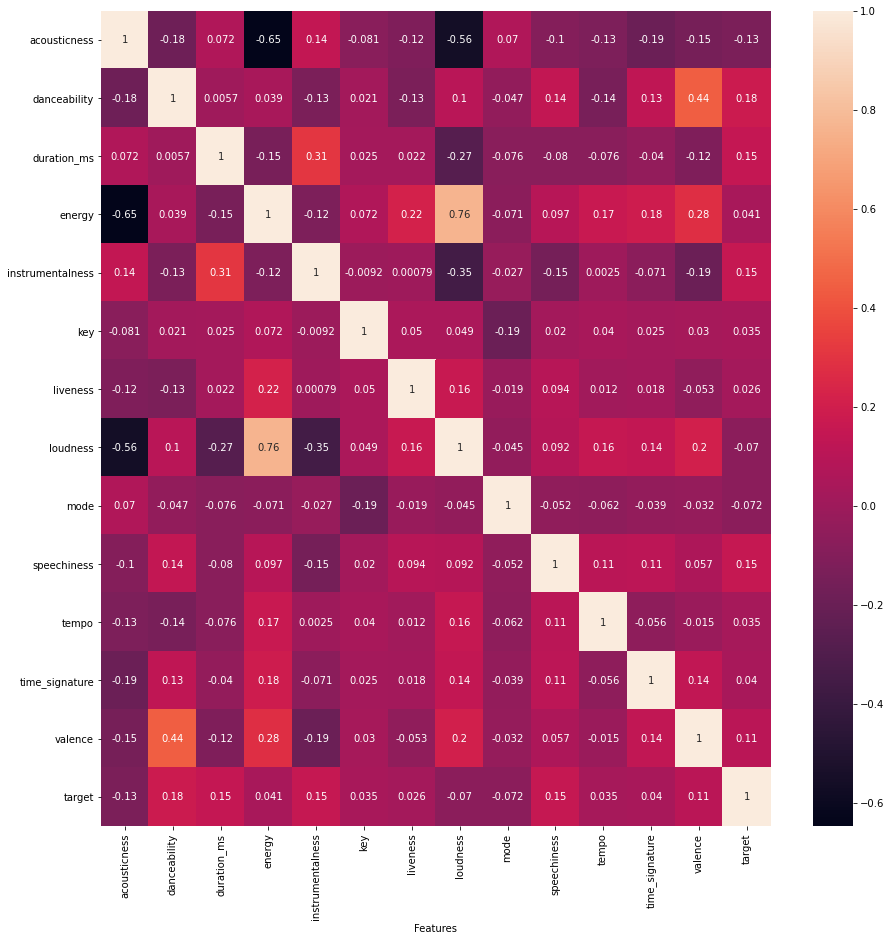

In [9]:
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(song.corr(), annot=True,fmt = '.2g', ax= ax)
plt.xlabel('Features')
plt.show()
#song.corr(method ='pearson')

In [10]:
song.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1



# Create my model 

## <li> Import the library we need to use for the following step

In [11]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [12]:
# Split Data into X and Y

X = song.drop('target', axis = 1)
Y = song['target']

x_train , x_test , y_train , y_test  = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)
x_train , x_vali , y_train , y_vali  = train_test_split(x_train, y_train, test_size=0.25, shuffle=True, random_state=1) # for Validation

In [13]:
print("All Data             :  ",len(song))
print("____________________________________")
print("")
print("Training Dataset     :  ",len(x_train))
print("Validation Dataset   :  ",len(x_vali))
print("Testing Dataset      :  ",len(x_test))
print("")

All Data             :   2012
____________________________________

Training Dataset     :   1206
Validation Dataset   :   403
Testing Dataset      :   403



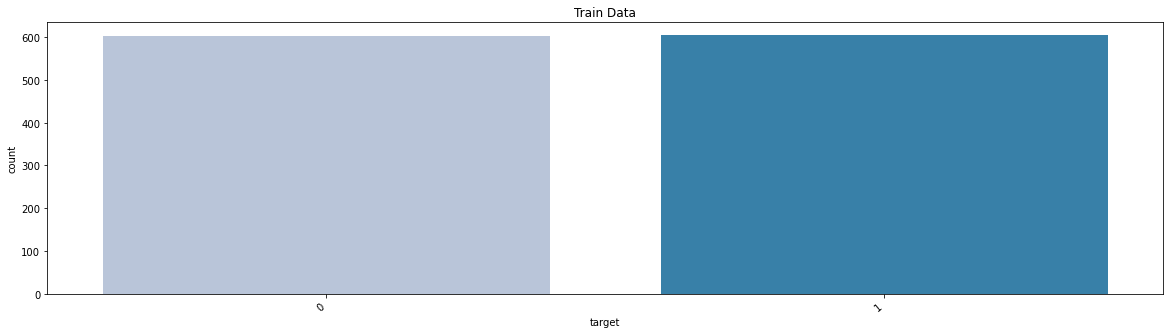

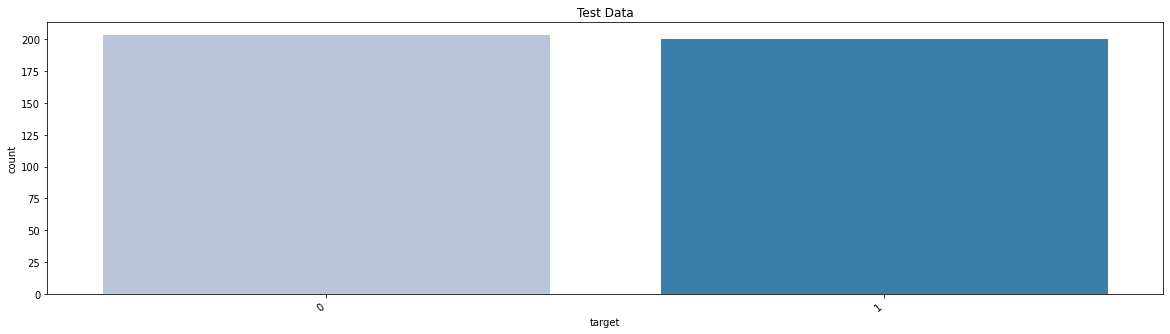

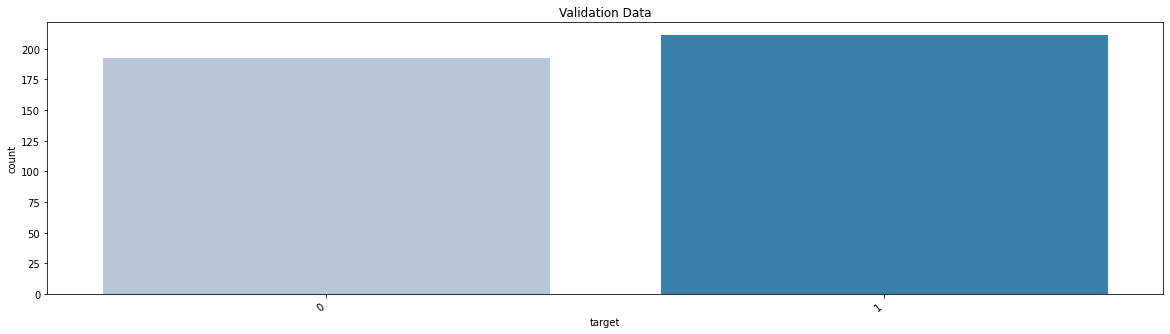

In [14]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(x=y_train, palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.title('Train Data')
plt.show()

plt.figure(figsize = (20, 5))
ax = sns.countplot(x=y_test, palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.title('Test Data')
plt.show()

plt.figure(figsize = (20, 5))
ax = sns.countplot(x=y_vali, palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.title('Validation Data')
plt.show()

# Logistic Regression

In [15]:
log = LogisticRegression()
log.fit(x_train,y_train)

log_test_pred = log.predict(x_test)
log_vali_pred = log.predict(x_vali)


print("Validation Accuracy: {:.2f}%".format(log.score(x_vali, y_vali) * 100))
print("Test Accuracy: {:.2f}%".format(log.score(x_test, y_test) * 100))


print("________________________________\n")
print(sklearn.metrics.classification_report(y_vali,log_vali_pred))
print("________________________________\n")
print(sklearn.metrics.classification_report(y_test,log_test_pred))

print("________________________________")
print("________________________________")
print("________________________________")


log_precision_test=precision_score(y_test, log_test_pred)
log_recall_test=recall_score(y_test, log_test_pred)

print('\nTest set evaluation:\n_____________________________________')
print("\nprecision:",log_precision_test) 
print("recall:",log_recall_test,"\n")

print("________________________________")
print("________________________________")

log_precision_vali=precision_score(y_vali, log_vali_pred)
log_recall_vali=recall_score(y_vali, log_vali_pred)

print('\nValidation set evaluation:\n_____________________________________')
print("\nprecision:",log_precision_vali) 
print("recall:",log_recall_vali,"\n")

Validation Accuracy: 52.36%
Test Accuracy: 49.63%
________________________________

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.52      1.00      0.69       211

    accuracy                           0.52       403
   macro avg       0.26      0.50      0.34       403
weighted avg       0.27      0.52      0.36       403

________________________________

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.50      1.00      0.66       200

    accuracy                           0.50       403
   macro avg       0.25      0.50      0.33       403
weighted avg       0.25      0.50      0.33       403

________________________________
________________________________
________________________________

Test set evaluation:
_____________________________________

precision: 0.49627791563275436
recall: 1.0 

_______________________

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

# Gaussian Naive Bayes

In [16]:
NB = GaussianNB()

NB.fit(x_train,y_train)

NB_test_pred = NB.predict(x_test)
NB_vali_pred = NB.predict(x_vali)


print("Validation Accuracy: {:.2f}%".format(NB.score(x_vali, y_vali) * 100))
print("Test Accuracy: {:.2f}%".format(NB.score(x_test, y_test) * 100))


print("________________________________\n")
print(sklearn.metrics.classification_report(y_vali,NB.predict(x_vali)))
print("________________________________\n")
print(sklearn.metrics.classification_report(y_test,NB.predict(x_test)))


print("________________________________")
print("________________________________")
print("________________________________")


NB_precision_test = precision_score(y_test, NB_test_pred)
NB_recall_test = recall_score(y_test, NB_test_pred)

print('\nTest set evaluation:\n_____________________________________')
print("\nprecision:",NB_precision_test) 
print("recall:",NB_recall_test,"\n")

print("________________________________")
print("________________________________")

NB_precision_vali = precision_score(y_vali, NB_vali_pred)
NB_recall_vali = recall_score(y_vali, NB_vali_pred)

print('\nValidation set evaluation:\n_____________________________________')
print("\nprecision:",NB_precision_vali) 
print("recall:",NB_recall_vali,"\n")

Validation Accuracy: 60.05%
Test Accuracy: 58.31%
________________________________

              precision    recall  f1-score   support

           0       0.57      0.67      0.62       192
           1       0.64      0.54      0.58       211

    accuracy                           0.60       403
   macro avg       0.61      0.60      0.60       403
weighted avg       0.61      0.60      0.60       403

________________________________

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       203
           1       0.59      0.53      0.56       200

    accuracy                           0.58       403
   macro avg       0.58      0.58      0.58       403
weighted avg       0.58      0.58      0.58       403

________________________________
________________________________
________________________________

Test set evaluation:
_____________________________________

precision: 0.5898876404494382
recall: 0.525 

______________________

# Decision Tree

In [17]:
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier(max_depth = 5)
DT.fit(x_train,y_train)

DT_test_pred = DT.predict(x_test)
DT_vali_pred = DT.predict(x_vali)


print("Validation Accuracy: {:.2f}%".format(DT.score(x_vali, y_vali) * 100))
print("Test Accuracy: {:.2f}%".format(DT.score(x_test, y_test) * 100))

print("________________________________")
print(sklearn.metrics.classification_report(y_vali,DT.predict(x_vali)))
print("________________________________")
print(sklearn.metrics.classification_report(y_test,DT.predict(x_test)))

print("________________________________")
print("________________________________")
print("________________________________")


DT_precision_test = precision_score(y_test, DT_test_pred)
DT_recall_test = recall_score(y_test, DT_test_pred)

print('\nTest set evaluation:\n_____________________________________')
print("\nprecision:",DT_precision_test) 
print("recall:",DT_recall_test,"\n")

print("________________________________")
print("________________________________")

DT_precision_vali = precision_score(y_vali, DT_vali_pred)
DT_recall_vali = recall_score(y_vali, DT_vali_pred)

print('\nValidation set evaluation:\n_____________________________________')
print("\nprecision:",DT_precision_vali) 
print("recall:",DT_recall_vali,"\n")

Validation Accuracy: 70.47%
Test Accuracy: 73.70%
________________________________
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       192
           1       0.72      0.71      0.71       211

    accuracy                           0.70       403
   macro avg       0.70      0.70      0.70       403
weighted avg       0.71      0.70      0.70       403

________________________________
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       203
           1       0.73      0.74      0.74       200

    accuracy                           0.74       403
   macro avg       0.74      0.74      0.74       403
weighted avg       0.74      0.74      0.74       403

________________________________
________________________________
________________________________

Test set evaluation:
_____________________________________

precision: 0.7326732673267327
recall: 0.74 

_________________________

# K-Nearest Neighbors (KNN)

In [18]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train,y_train)

KNN_test_pred = KNN.predict(x_test)
KNN_vali_pred = KNN.predict(x_vali)


print("Validation Accuracy: {:.2f}%".format(KNN.score(x_vali, y_vali) * 100))
print("Test Accuracy: {:.2f}%".format(KNN.score(x_test, y_test) * 100))


print("________________________________")
print(sklearn.metrics.classification_report(y_vali,KNN.predict(x_vali)))
print("________________________________")
print(sklearn.metrics.classification_report(y_test,KNN.predict(x_test)))

print("________________________________")
print("________________________________")
print("________________________________")


KNN_precision_test = precision_score(y_test, KNN_test_pred)
KNN_recall_test = recall_score(y_test, KNN_test_pred)

print('\nTest set evaluation:\n_____________________________________')
print("\nprecision:",KNN_precision_test) 
print("recall:",KNN_recall_test,"\n")

print("________________________________")
print("________________________________")

KNN_precision_vali = precision_score(y_vali, KNN_vali_pred)
KNN_recall_vali = recall_score(y_vali, KNN_vali_pred)

print('\nValidation set evaluation:\n_____________________________________')
print("\nprecision:",KNN_precision_vali) 
print("recall:",KNN_recall_vali,"\n")

Validation Accuracy: 54.59%
Test Accuracy: 57.57%
________________________________
              precision    recall  f1-score   support

           0       0.52      0.64      0.57       192
           1       0.58      0.46      0.51       211

    accuracy                           0.55       403
   macro avg       0.55      0.55      0.54       403
weighted avg       0.55      0.55      0.54       403

________________________________
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       203
           1       0.58      0.50      0.54       200

    accuracy                           0.58       403
   macro avg       0.58      0.58      0.57       403
weighted avg       0.58      0.58      0.57       403

________________________________
________________________________
________________________________

Test set evaluation:
_____________________________________

precision: 0.5847953216374269
recall: 0.5 

__________________________

# Sequential Classification (Neural Network)

In [19]:
x_train.shape[1]

13

Best Validation Loss: 0.6920
Best Validation Accuracy: 0.5236


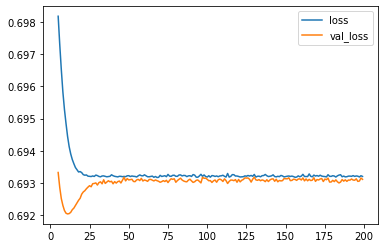

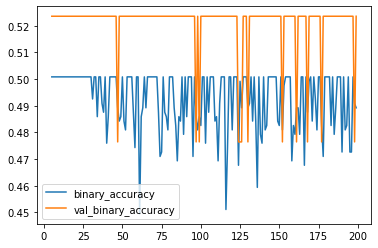

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

se = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(x_train.shape[1], )),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid')
])

se.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
    
history = se.fit(
    x_train, y_train,
    validation_data=(x_vali, y_vali),
    batch_size=10,
    epochs=200,
    verbose=0  # hide the output because we have so many epochs
)

SE_test_pred = se.predict(x_test)
SE_vali_pred = se.predict(x_vali)

history_df = pd.DataFrame(history.history)

# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))



# Compare Between The Models

## <li> Accuracy

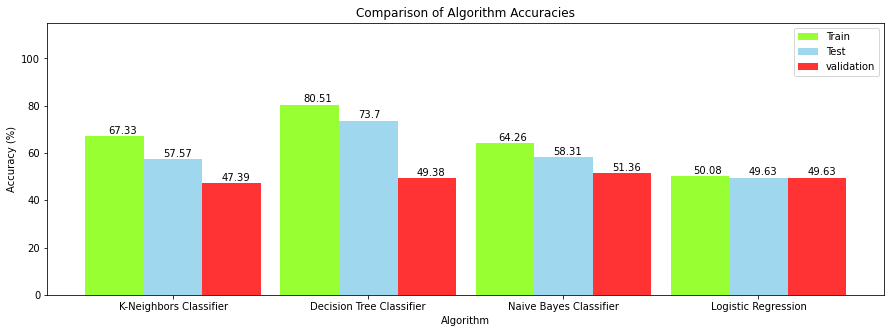

In [21]:
# data to plot
n = 4

algorithms = ('K-Neighbors Classifier','Decision Tree Classifier','Naive Bayes Classifier','Logistic Regression')

train_accuracy = (accuracy_score(y_train, KNN.predict(x_train))*100, 
                  accuracy_score(y_train, DT.predict(x_train))*100,
                  accuracy_score(y_train, NB.predict(x_train))*100,
                  accuracy_score(y_train, log.predict(x_train))*100)

test_accuracy = (accuracy_score(y_test, KNN_test_pred)*100, 
                 accuracy_score(y_test, DT_test_pred)*100,
                 accuracy_score(y_test, NB_test_pred)*100,
                 accuracy_score(y_test, log_test_pred)*100)


vali_accuracy = (accuracy_score(y_test, KNN_vali_pred)*100, 
                 accuracy_score(y_test, DT_vali_pred)*100,
                 accuracy_score(y_test, NB_vali_pred)*100,
                 accuracy_score(y_test, log_vali_pred)*100)


# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='chartreuse', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='skyblue', label='Test')
rects2 = plt.bar(index + bar_width + bar_width , vali_accuracy, bar_width, alpha = opacity, color='r', label='validation')

plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label

plt.ylim(0, 115)

plt.title('Comparison of Algorithm Accuracies') # plot title

plt.xticks(index + bar_width , algorithms) # x axis data labels

plt.legend(loc = 'upper right') # show legend

for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))
    
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))

for index, data in enumerate(vali_accuracy):
    plt.text(x = index + 0.55, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))
       
    
plt.show()

## <li> Precision

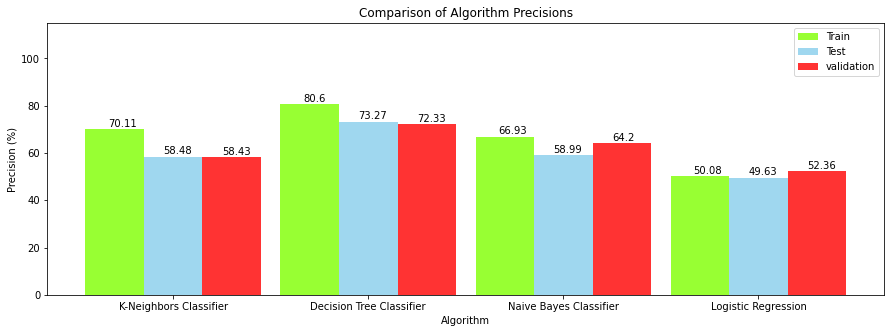

In [22]:
# data to plot
n = 4

algorithms = ('K-Neighbors Classifier','Decision Tree Classifier','Naive Bayes Classifier','Logistic Regression')


train_precision = (precision_score(y_train, KNN.predict(x_train))*100, 
                  precision_score(y_train, DT.predict(x_train))*100,
                  precision_score(y_train, NB.predict(x_train))*100,
                  precision_score(y_train, log.predict(x_train))*100)

test_precision = (KNN_precision_test*100, 
                 DT_precision_test*100,
                 NB_precision_test*100,
                 log_precision_test*100)


vali_precision = (KNN_precision_vali*100, 
                 DT_precision_vali*100,
                 NB_precision_vali*100,
                 log_precision_vali*100)


# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, train_precision, bar_width, alpha = opacity, color='chartreuse', label='Train')
rects2 = plt.bar(index + bar_width, test_precision, bar_width, alpha = opacity, color='skyblue', label='Test')
rects2 = plt.bar(index + bar_width + bar_width , vali_precision, bar_width, alpha = opacity, color='r', label='validation')

plt.xlabel('Algorithm') # x axis label
plt.ylabel('Precision (%)') # y axis label

plt.ylim(0, 115)

plt.title('Comparison of Algorithm Precisions') # plot title

plt.xticks(index + bar_width , algorithms) # x axis data labels

plt.legend(loc = 'upper right') # show legend

for index, data in enumerate(train_precision):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))
    
for index, data in enumerate(test_precision):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))

for index, data in enumerate(vali_precision):
    plt.text(x = index + 0.55, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))
       
    
plt.show()

## <li> Recall

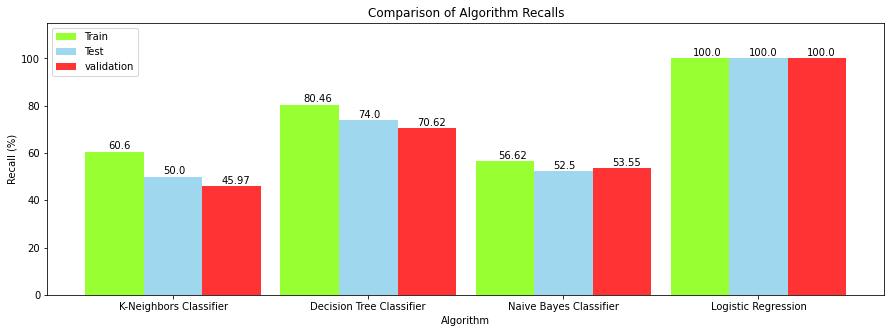

In [23]:
# data to plot
n = 4

algorithms = ('K-Neighbors Classifier','Decision Tree Classifier','Naive Bayes Classifier','Logistic Regression')


train_recall = (recall_score(y_train, KNN.predict(x_train))*100, 
                  recall_score(y_train, DT.predict(x_train))*100,
                  recall_score(y_train, NB.predict(x_train))*100,
                  recall_score(y_train, log.predict(x_train))*100)

test_recall = (KNN_recall_test*100, 
                 DT_recall_test*100,
                 NB_recall_test*100,
                 log_recall_test*100)


vali_recall = (KNN_recall_vali*100, 
                 DT_recall_vali*100,
                 NB_recall_vali*100,
                 log_recall_vali*100)


# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, train_recall, bar_width, alpha = opacity, color='chartreuse', label='Train')
rects2 = plt.bar(index + bar_width, test_recall, bar_width, alpha = opacity, color='skyblue', label='Test')
rects2 = plt.bar(index + bar_width + bar_width , vali_recall, bar_width, alpha = opacity, color='r', label='validation')

plt.xlabel('Algorithm') # x axis label
plt.ylabel('Recall (%)') # y axis label

plt.ylim(0, 115)

plt.title('Comparison of Algorithm Recalls') # plot title

plt.xticks(index + bar_width , algorithms) # x axis data labels

plt.legend(loc = 'upper left') # show legend

for index, data in enumerate(train_recall):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))
    
for index, data in enumerate(test_recall):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))

for index, data in enumerate(vali_recall):
    plt.text(x = index + 0.55, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 10))
       
    
plt.show()

## <li> Confusion Matrix

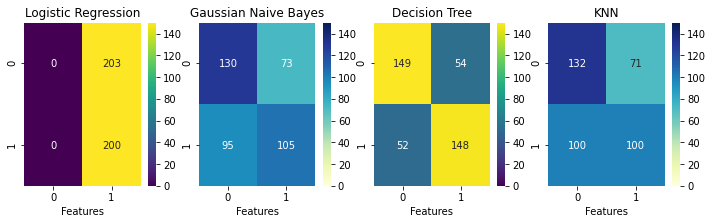

In [24]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (12,3))

#1. Logistic Regression
LogregCM = confusion_matrix(y_test,log_test_pred)
sns.heatmap(LogregCM, annot = True, fmt = 'd', vmin = 0, vmax = 150,cmap = 'viridis', ax = ax1)
#Annot: the value of the heatmap
#fmt: the decimal point of value of heatmap
#vmin, vmax: the limits of the colorbar
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Features')

#2. Gaussian Naive Bayes
NBCM = confusion_matrix(y_test,NB_test_pred)
sns.heatmap(NBCM, annot = True, fmt = 'd', vmin = 0, vmax = 150, cmap = 'YlGnBu', ax = ax2)
ax2.set_title('Gaussian Naive Bayes')
ax2.set_xlabel('Features')


#3. Decision Tree
DTCM = confusion_matrix(y_test, DT_test_pred)
sns.heatmap(DTCM, annot = True, fmt = 'd', vmin = 0, vmax = 150, cmap = 'viridis', ax = ax3)
ax3.set_title('Decision Tree')
ax3.set_xlabel('Features')


#4. KNN
KNNCM = confusion_matrix(y_test, KNN_test_pred)
sns.heatmap(KNNCM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu', ax = ax4)
ax4.set_title('KNN')
ax4.set_xlabel('Features')


plt.show()

# Feature Importance

In [25]:
# identify the important features in DT
coefficients = DT.feature_importances_

# combine list of symptoms and their feature importance into a 2D array
columns = list(songs.columns)
columns = columns[:x_train.shape[1]]
column_names = ['features', 'importance']
df3 = np.vstack((columns, coefficients)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3

,features,importance
0,acousticness,0.024527522011865324
1,danceability,0.06434403270645295
2,duration_ms,0.09998249258464041
3,energy,0.17381445687138264
4,instrumentalness,0.23476590570933847
5,key,0.0
6,liveness,0.0355735853537859
7,loudness,0.16462917048595702
8,mode,0.0
9,speechiness,0.12375921955459918


In [26]:
"""# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], 
             labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Decision Tree Model")

# cut off value as the minimum threshold for feature importance
#fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
#fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.1)
fig.show()

print("________________________________________________________________________________________________")
print(" feature importance showed that some features are not really important so we will drop it.")
print(" we will drop ( mode , time_signature , key , acousticness )")
print("________________________________________________________________________________________________")

dataset = song.drop(['mode','time_signature', 'key', 'acousticness'], axis = 1,inplace=True)
print('The Dimension of the dataset after drop the features:', song.shape)

print(" *Feature Impotance* after dropping the none impotance features  ")
print("________________________________________________________________________________________________")

"""


'# set a minimum threshold for feature importance\nimportance_threshold = np.quantile(coefficients, q = 0.75)\nimport plotly.express as px\n\n# barplot of feature importance\nfig = px.bar(x = coefficients, y = columns, orientation = \'h\', color = coefficients, \n             color_continuous_scale = [(0, \'#b7d2e8\'), (1, \'#295981\')], \n             labels = {\'x\': "Importance Value", \'y\': "Feature"}, \n             title = "Feature Importance For Decision Tree Model")\n\n# cut off value as the minimum threshold for feature importance\n#fig.add_vline(x = importance_threshold, line_color = \'red\', line_width = 0.8)\n#fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = \'red\', opacity = 0.1)\nfig.show()\n\nprint("________________________________________________________________________________________________")\nprint(" feature importance showed that some features are not really important so we will drop it.")\nprint(" we will drop ( mode , time_signature 

# Predict New Data

In [27]:
newdata=[[0.0102,0.833,204600,0.434,0.0219,2,0.165,-8.795,1,0.431,150.062,4,0.286]]

pred1=NB.predict(newdata)
pred2=KNN.predict(newdata)
pred3=log.predict(newdata)
pred4=DT.predict(newdata)
pred5=np.argmax(se.predict(newdata), axis=-1)


print("Gaussian Naive Bayes : ",pred1)
print("K-Nearest Neighbors  : ",pred2)
print("Logistic Regression  : ",pred3)
print("Decision Tree        : ",pred4)
print("Sequential           : ",pred5)

Gaussian Naive Bayes :  [0]
K-Nearest Neighbors  :  [0]
Logistic Regression  :  [1]
Decision Tree        :  [1]
Sequential           :  [0]


In [28]:
newdata=[[0.0581,0.64,272160,0.947,0,9,0.0656,-3.925,0,0.102,145.108,4,0.68]]

pred1=NB.predict(newdata)
pred2=KNN.predict(newdata)
pred3=log.predict(newdata)
pred4=DT.predict(newdata)
pred5=np.argmax(se.predict(newdata), axis=-1)


print("Gaussian Naive Bayes : ",pred1)
print("K-Nearest Neighbors  : ",pred2)
print("Logistic Regression  : ",pred3)
print("Decision Tree        : ",pred4)
print("Sequential           : ",pred5)

Gaussian Naive Bayes :  [1]
K-Nearest Neighbors  :  [1]
Logistic Regression  :  [1]
Decision Tree        :  [0]
Sequential           :  [0]


In [29]:
newdata=[[0.0803,0.524,393827,0.429,1.37E-05,1,0.0726,-10.064,1,0.0279,131.206,4,0.237]]

pred1=NB.predict(newdata)
pred2=KNN.predict(newdata)
pred3=log.predict(newdata)
pred4=DT.predict(newdata)
pred5=np.argmax(se.predict(newdata), axis=-1)


print("Gaussian Naive Bayes : ",pred1)
print("K-Nearest Neighbors  : ",pred2)
print("Logistic Regression  : ",pred3)
print("Decision Tree        : ",pred4)
print("Sequential           : ",pred5)

Gaussian Naive Bayes :  [1]
K-Nearest Neighbors  :  [1]
Logistic Regression  :  [1]
Decision Tree        :  [0]
Sequential           :  [0]


In [30]:
newdata=[[0.0449,0.706,225253,0.893,1.04E-06,10,0.301,-4.355,0,0.0449,108.006,4,0.616]]

pred1=NB.predict(newdata)
pred2=KNN.predict(newdata)
pred3=log.predict(newdata)
pred4=DT.predict(newdata)
pred5=np.argmax(se.predict(newdata), axis=-1)


print("Gaussian Naive Bayes : ",pred1)
print("K-Nearest Neighbors  : ",pred2)
print("Logistic Regression  : ",pred3)
print("Decision Tree        : ",pred4)
print("Sequential           : ",pred5)

Gaussian Naive Bayes :  [0]
K-Nearest Neighbors  :  [0]
Logistic Regression  :  [1]
Decision Tree        :  [0]
Sequential           :  [0]
